In [1]:
import libpysal
import numpy as np
import geopandas as gpd 
from esda.moran import Moran_BV
import math
np.random.seed(10)
w = libpysal.io.open('./data_for_paper_final_version/Spatial weight matrix including diagonal.gal').read()
sf = gpd.read_file('./data_for_paper_final_version/Grids with hash rate and energy(201806-201905)/Grids with hash rate and energy(201806-201905).shp')

In [2]:
cap_fossil_lg = [math.log10(i+1) for i in sf['Cap.Fos']]
cap_renewable_lg = [math.log10(i+1) for i in sf['Cap.Ren']]
cap_all_lg = [math.log10(i+1) for i in sf['Cap.All']]
h_rate_lg = [math.log10(i+1) for i in sf['HrateAvg']]

In [3]:
mbi_fos = Moran_BV(h_rate_lg, cap_fossil_lg, w, transformation='r', permutations=999)
mbi_ren = Moran_BV(h_rate_lg, cap_renewable_lg, w, transformation='r', permutations=999)
mbi_all = Moran_BV(h_rate_lg, cap_all_lg, w, transformation='r', permutations=999)
print("Bivariate Moran All :", mbi_all.I, mbi_all.p_sim, mbi_all.z_sim, mbi_all.EI_sim, mbi_all.VI_sim,mbi_all.seI_sim)
print("Bivariate Moran Fos :", mbi_fos.I, mbi_fos.p_sim, mbi_fos.z_sim, mbi_fos.EI_sim, mbi_fos.VI_sim,mbi_fos.seI_sim)
print("Bivariate Moran Ren :", mbi_ren.I, mbi_ren.p_sim, mbi_ren.z_sim, mbi_ren.EI_sim, mbi_ren.VI_sim,mbi_ren.seI_sim)

Bivariate Moran All : 0.5860938409904622 0.001 60.74168355883924 0.0002209530401073722 9.303217017299047e-05 0.009645318562545795
Bivariate Moran Fos : 0.5650604920356921 0.001 59.64287496496784 8.525200839554032e-05 8.973083135612063e-05 0.009472635924394046
Bivariate Moran Ren : 0.5122519758980071 0.001 53.58828875804537 -0.0003110630783130354 9.148603254892364e-05 0.009564833116626951


In [ ]:
'''
source code for esda.Moran_BV
https://pysal.org/esda/_modules/esda/moran.html#Moran_BV

class Moran_BV(object):
    def __init__(self, x, y, w, transformation="r", permutations=PERMUTATIONS):
        x = np.asarray(x).flatten()
        y = np.asarray(y).flatten()
        zy = (y - y.mean()) / y.std(ddof=1)
        zx = (x - x.mean()) / x.std(ddof=1)
        self.y = y
        self.x = x
        self.zx = zx
        self.zy = zy
        n = x.shape[0]
        w.transform = transformation
        self.w = w
        self.I = self.__calc(zy)
        if permutations:
            nrp = np.random.permutation
            sim = [self.__calc(nrp(zy)) for i in range(permutations)]
            self.sim = sim = np.array(sim)
            above = sim >= self.I
            larger = above.sum()
            if (permutations - larger) < larger:
                larger = permutations - larger
            self.p_sim = (larger + 1.0) / (permutations + 1.0)
            self.EI_sim = sim.sum() / permutations
            self.seI_sim = np.array(sim).std()
            self.VI_sim = self.seI_sim ** 2
            self.z_sim = (self.I - self.EI_sim) / self.seI_sim
            if self.z_sim > 0:
                self.p_z_sim = 1 - stats.norm.cdf(self.z_sim)
            else:
                self.p_z_sim = stats.norm.cdf(self.z_sim)


    def __calc(self, zy):
        wzy = slag(self.w, zy)
        self.num = (self.zx * wzy).sum()
        return self.num / self.den

    @property
    def _statistic(self):
        """More consistent hidden attribute to access ESDA statistics"""
        return self.I

    @classmethod
    def by_col(
        cls,
        df,
        x,
        y=None,
        w=None,
        inplace=False,
        pvalue="sim",
        outvals=None,
        **stat_kws
    ):
       
        return _bivariate_handler(
            df,
            x,
            y=y,
            w=w,
            inplace=inplace,
            pvalue=pvalue,
            outvals=outvals,
            swapname=cls.__name__.lower(),
            stat=cls,
            **stat_kws
        )
'''

In [4]:
from splot.esda import plot_moran_bv
import matplotlib.pyplot as plt


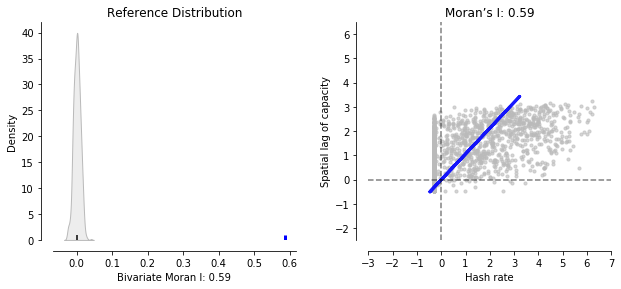

In [5]:
fig, ax = plot_moran_bv(mbi_all, figsize=(10,4),  scatter_kwds=dict(marker = 'o', s=10), fitline_kwds=dict(color='b', linewidth=3))
ticks = np.arange(-3, 8, 1)
plt.xticks(ticks)
plt.yticks(ticks)
ax[1].set_title('Moran’s I: '+str(round(mbi_all.I, 2)))
ax[1].set_xlabel('Hash rate')
ax[1].set_ylabel('Spatial lag of capacity')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

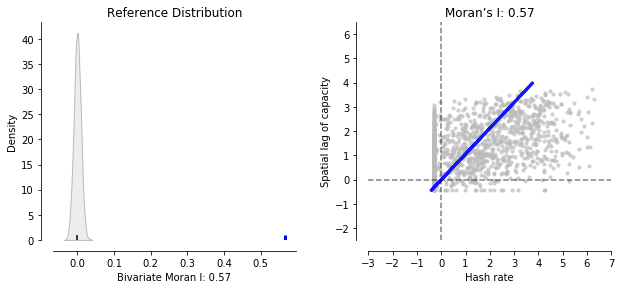

In [6]:
fig, ax = plot_moran_bv(mbi_fos, figsize=(10,4),  scatter_kwds=dict(marker = 'o', s=10), fitline_kwds=dict(color='b', linewidth=3))
ticks = np.arange(-3, 8, 1)
plt.xticks(ticks)
plt.yticks(ticks)
ax[1].set_title('Moran’s I: '+str(round(mbi_fos.I, 2)))
ax[1].set_xlabel('Hash rate')
ax[1].set_ylabel('Spatial lag of capacity')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

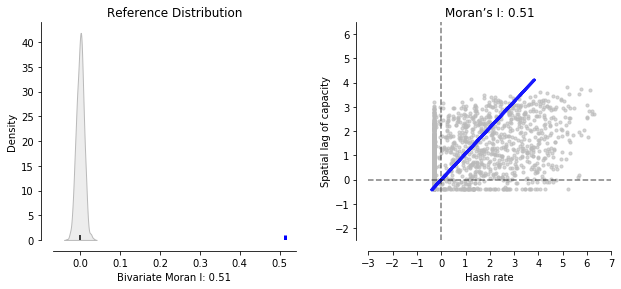

In [7]:
fig, ax = plot_moran_bv(mbi_ren, figsize=(10,4),  scatter_kwds=dict(marker = 'o', s=10), fitline_kwds=dict(color='b', linewidth=3))
ticks = np.arange(-3, 8, 1)
plt.xticks(ticks)
plt.yticks(ticks)
ax[1].set_title('Moran’s I: '+str(round(mbi_ren.I, 2)))
ax[1].set_xlabel('Hash rate')
ax[1].set_ylabel('Spatial lag of capacity')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)